In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

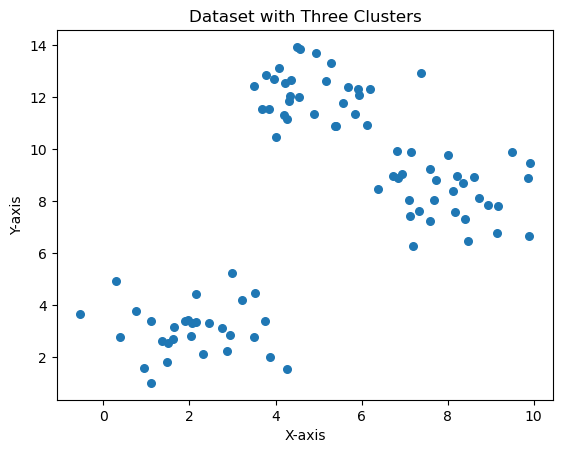

In [27]:
np.random.seed(0)
cluster1 = np.random.randn(30, 2) + np.array([2, 3])
cluster2 = np.random.randn(30, 2) + np.array([8, 8])
cluster3 = np.random.randn(30, 2) + np.array([5, 12])

data = np.vstack((cluster1, cluster2, cluster3))

plt.scatter(data[:, 0], data[:, 1], s=30)
plt.title('Dataset with Three Clusters')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [28]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [29]:
def complete_linkage_clustering(data):
    clusters = [[point] for point in data]

    while len(clusters) > 1:
        max_distance = -1
        merge_indices = None

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                cluster1 = clusters[i]
                cluster2 = clusters[j]

                # Calculate the maximum distance between two clusters
                distance = max(
                    euclidean_distance(point1, point2)
                    for point1 in cluster1
                    for point2 in cluster2
                )

                if distance > max_distance:
                    max_distance = distance
                    merge_indices = (i, j)

        if merge_indices is not None:
            i, j = merge_indices
            clusters[i].extend(clusters[j])
            del clusters[j]

    return clusters

In [30]:
resulting_clusters = complete_linkage_clustering(data)

In [32]:
# for i, cluster in enumerate(resulting_clusters):
#     print(f"Cluster {i + 1}: {cluster}")

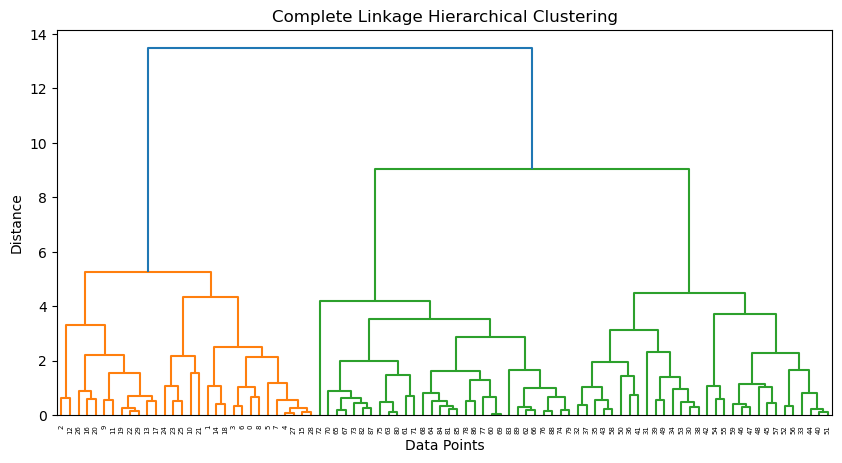

In [33]:
Z = linkage(data, method='complete')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Complete Linkage Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()